# MA 541 Group 5 Spring 2022 Semester
### Athina Cordero,  Matthew Cusick 
### Alejandro Gomez,  Shamsul Shamsuzzoha


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy.stats import norm
import statistics
from numpy import mean 
from numpy import std
from statsmodels.graphics.gofplots import qqplot
import statsmodels.graphics.gofplots as sm 
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt


In [20]:
project_data = pd.read_csv('data.csv')
descriptive_stats = project_data.describe()
print(descriptive_stats)

         Close_ETF          oil         gold          JPM
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    121.152960     0.001030     0.000663     0.000530
std      12.569790     0.021093     0.011289     0.011017
min      96.419998    -0.116533    -0.065805    -0.048217
25%     112.580002    -0.012461    -0.004816    -0.005538
50%     120.150002     0.001243     0.001030     0.000386
75%     128.687497     0.014278     0.007482     0.006966
max     152.619995     0.087726     0.042199     0.057480


<div class="alert alert-success">
 <strong>Histogram plots<strong>

In [21]:
correlation_coefficients = project_data.corr(method='pearson')
print(correlation_coefficients)

           Close_ETF       oil      gold       JPM
Close_ETF   1.000000 -0.009045  0.022996  0.036807
oil        -0.009045  1.000000  0.235650 -0.120849
gold        0.022996  0.235650  1.000000  0.100170
JPM         0.036807 -0.120849  0.100170  1.000000


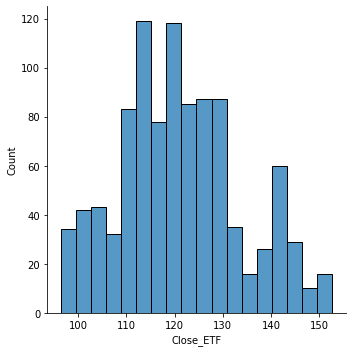

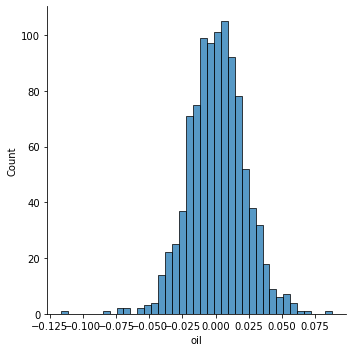

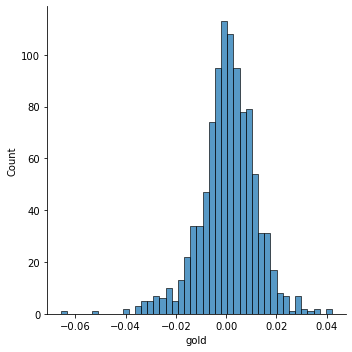

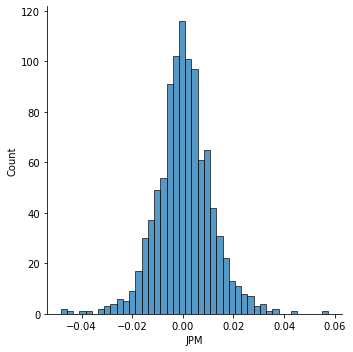

In [22]:
hist_Close_ETF = sns.displot(project_data, x="Close_ETF")

hist_oil = sns.displot(project_data, x="oil")

hist_gold = sns.displot(project_data, x="gold")

hist_JPM = sns.displot(project_data, x="JPM")

<div class="alert alert-success">
<strong> Time series plots <strong>

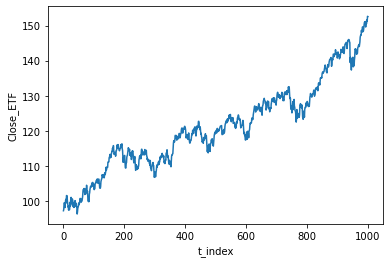

In [23]:
project_data.insert(
    loc=0,
    column='t_index',
    value=np.arange(1,1001)
)

project_data.head()

ts_Close_ETF = sns.lineplot(data=project_data, x="t_index", y="Close_ETF")

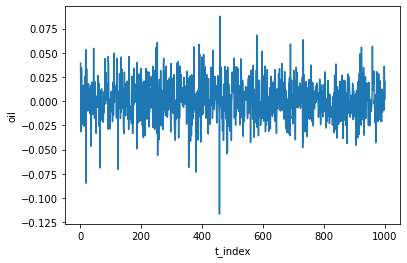

In [24]:
ts_oil = sns.lineplot(data=project_data, x="t_index", y="oil")

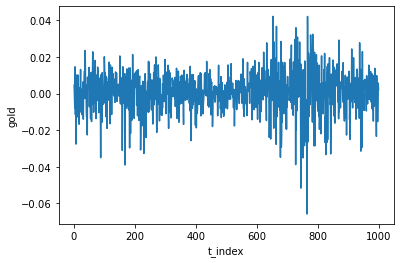

In [25]:
ts_gold = sns.lineplot(data=project_data, x="t_index", y="gold")

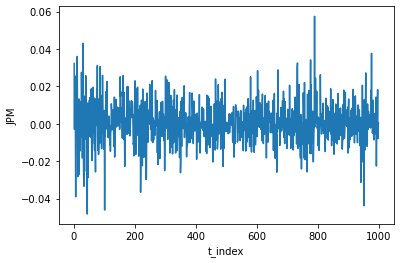

In [26]:
ts_JPM = sns.lineplot(data=project_data, x="t_index", y="JPM")

<div class="alert alert-success">
<strong>All four series on a single chart


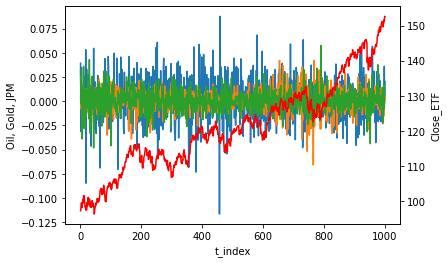

In [27]:
sns.lineplot(data=project_data, x="t_index", y="oil")
sns.lineplot(data=project_data, x="t_index", y="gold")
sns.lineplot(data=project_data, x="t_index", y="JPM")
plt.ylabel('Oil, Gold, JPM')
ax2 = plt.twinx()
sns.lineplot(data=project_data, x="t_index", y="Close_ETF", ax = ax2, color = 'r')

plt.show()

<div class="alert alert-success">
<strong>Scatter plots


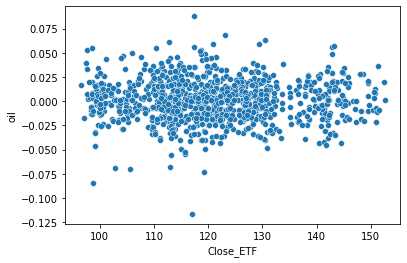

In [28]:
scatter_ETF_oil = sns.scatterplot(data=project_data, x="Close_ETF", y="oil")

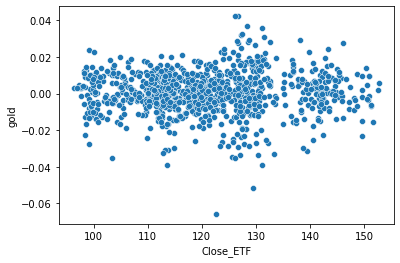

In [29]:
scatter_ETF_gold = sns.scatterplot(data=project_data, x="Close_ETF", y="gold")

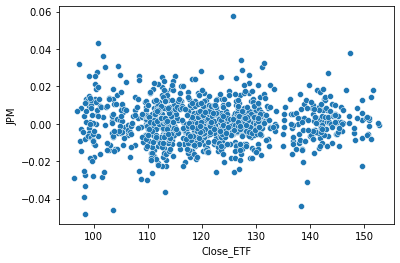

In [30]:
scatter_ETF_JPM = sns.scatterplot(data=project_data, x="Close_ETF", y="JPM")

In [31]:
mean_close_ETF=project_data['Close_ETF'].mean()

In [32]:
print(mean_close_ETF)

121.1529600120001


In [33]:
#mean_close_etf = project_data('Close_ETF').mean()

mean_project_data = project_data.mean()
std_project_data = project_data.std()
print('Mean is: \n',mean_project_data)
print('Standard Deviation is: \n',std_project_data)

Mean is: 
 t_index      500.500000
Close_ETF    121.152960
oil            0.001030
gold           0.000663
JPM            0.000530
dtype: float64
Standard Deviation is: 
 t_index      288.819436
Close_ETF     12.569790
oil            0.021093
gold           0.011289
JPM            0.011017
dtype: float64


121.1529600120001
12.569790313110744


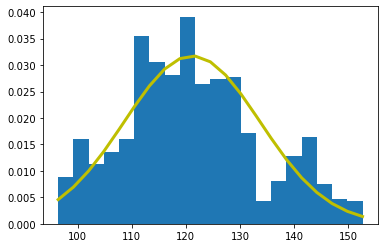

In [34]:
#close_eft
close_etf = project_data['Close_ETF']
mu_closed_etf = close_etf.mean()
sigma_closed_etf = close_etf.std()
print(mu_closed_etf)
print(sigma_closed_etf)

count, bins, ignored = plt.hist(close_etf, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma_closed_etf * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu_closed_etf)**2 / (2 * sigma_closed_etf**2) ), linewidth=3, color='y')
plt.show()

0.0010300354900000003
0.021092898546652347


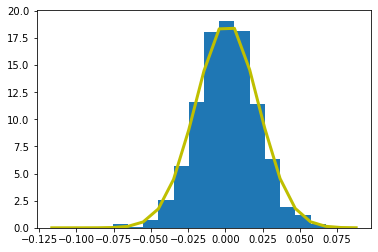

0.0006628360819999998
0.011289060259316142


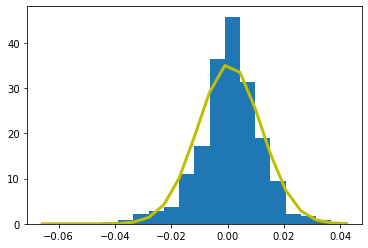

0.0005304110210000002
0.011016562382593569


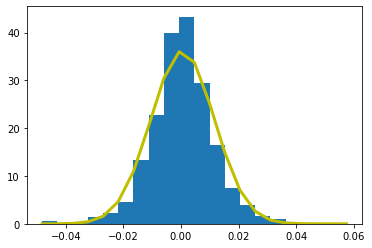

In [35]:
#oil

oil = project_data['oil']
mu_oil = oil.mean()
sigma_oil = oil.std()
print(mu_oil)
print(sigma_oil)

count, bins, ignored = plt.hist(oil, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma_oil * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu_oil)**2 / (2 * sigma_oil**2) ), linewidth=3, color='y')
plt.show()

#gold

gold = project_data['gold']
mu_gold = gold.mean()
sigma_gold = gold.std()
print(mu_gold)
print(sigma_gold)

count, bins, ignored = plt.hist(gold, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma_gold * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu_gold)**2 / (2 * sigma_gold**2) ), linewidth=3, color='y')
plt.show()


#jpm

J_P_M = project_data['JPM']
mu_jpm = J_P_M.mean()
sigma_jpm = J_P_M.std()
print(mu_jpm)
print(sigma_jpm)

count, bins, ignored = plt.hist(J_P_M, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma_jpm * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu_jpm)**2 / (2 * sigma_jpm**2) ), linewidth=3, color='y')
plt.show()

By observing the histogram, the variables are following normal distribution

<div class="alert alert-success">
<strong>NORMALITY TESTS

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


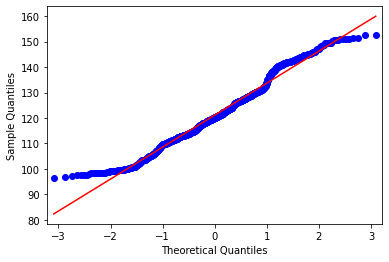

In [36]:
qqplot_project_data_close_etf = qqplot(project_data['Close_ETF'],line='s').gca().lines

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


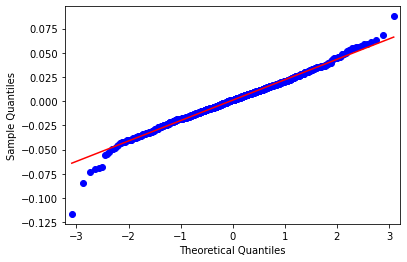

In [37]:
qqplot_project_data_oil = qqplot(project_data['oil'],line='s').gca().lines

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


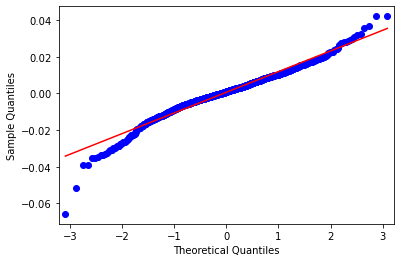

In [38]:
qqplot_project_data_gold = qqplot(project_data['gold'],line='s').gca().lines

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


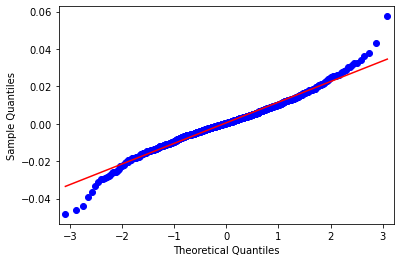

In [39]:
qqplot_project_JPM = qqplot(project_data['JPM'],line='s').gca().lines

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


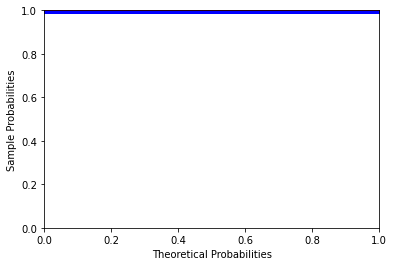

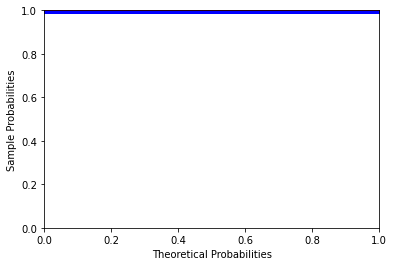

In [41]:
#ppplot_project_data_close_etf = ppplot(project_data['Close_ETF'],line='s').gca().lines
sm.ProbPlot(np.array(project_data['Close_ETF'])).ppplot(line='s') 

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


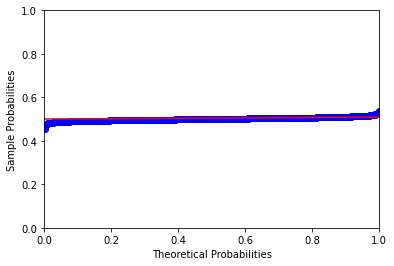

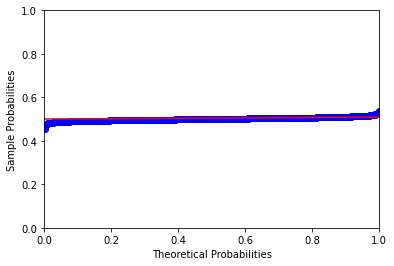

In [42]:
sm.ProbPlot(np.array(project_data['oil'])).ppplot(line='s') 

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


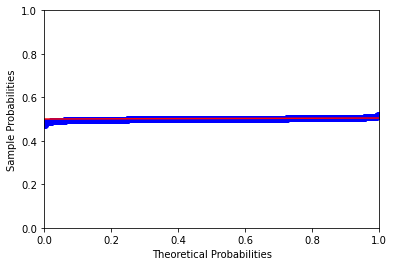

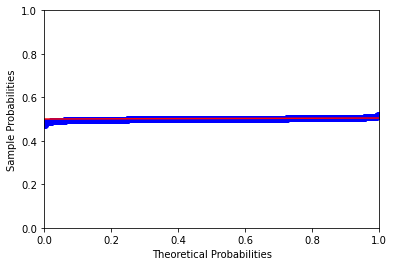

In [43]:
sm.ProbPlot(np.array(project_data['gold'])).ppplot(line='s') 

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


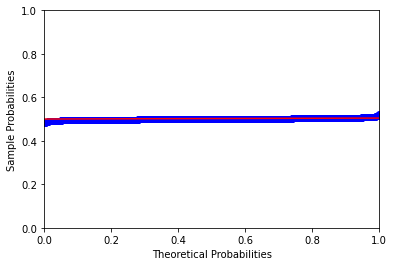

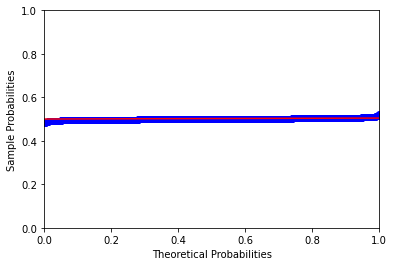

In [44]:
sm.ProbPlot(np.array(project_data['JPM'])).ppplot(line='s') 

In [45]:
from scipy.stats import shapiro
mean_closed_etf = project_data['Close_ETF'].mean()
std_closed_etf = project_data['Close_ETF'].std()
norm_closed_etf = (project_data['Close_ETF'] - mean_closed_etf)/std_closed_etf
stat_c, p_c = shapiro(norm_closed_etf)

# interpret
alpha = 0.0001
if p_c > alpha:
    msg_c = 'Closed-ETF looks Gaussian (fail to reject H0)'
else:
    msg_c = 'Closed-ETF does not look Gaussian (reject H0)'
    
print(msg_c)

Closed-ETF does not look Gaussian (reject H0)


In [46]:
mean_oil = project_data['oil'].mean()
std_oil = project_data['oil'].std()
norm_oil = (project_data['oil'] - mean_oil)/std_oil
stat_o, p_o = shapiro(norm_oil)

# interpret
alpha = 5.488e-08
if p_o > alpha:
    msg_o = 'Oil looks Gaussian (fail to reject H0)'
else:
    msg_o = 'Oil does not look Gaussian (reject H0)'
    
print(msg_o,p_o)

Oil looks Gaussian (fail to reject H0) 5.488049623636471e-07


In [47]:
mean_gold = project_data['gold'].mean()
std_gold = project_data['oil'].std()
norm_gold = (project_data['oil'] - mean_oil)/std_oil
stat_g, p_g = shapiro(project_data['gold'])

# interpret
alpha = 0.05
if p_g > alpha:
    msg_g = 'Gold looks Gaussian (fail to reject H0)'
else:
    msg_g = 'Gold does not look Gaussian (reject H0)'
    
print(msg_g)

Gold does not look Gaussian (reject H0)


In [48]:
stat_j, p_j = shapiro(project_data['JPM'])

# interpret
alpha = 0.05
if p_j > alpha:
    msg_j = 'JPM looks Gaussian (fail to reject H0)'
else:
    msg_j = 'JPM does not look Gaussian (reject H0)'
    
print(msg_j)

JPM does not look Gaussian (reject H0)


<div class="alert alert-info">
<strong>Part 4

 <div class="alert alert-success">
<strong>Q1

In [49]:
project_data['Close_ETF'].mean()

121.1529600120001

In [50]:
project_data['Close_ETF'].std()

12.569790313110744

 <div class="alert alert-success">
<strong> Q2

In [51]:
# 50 groups of 20 values each
close_etf_50_of_20 = np.array_split(project_data['Close_ETF'].to_numpy(), 50)
close_etf_50_of_20

[array([ 97.349998,  97.75    ,  99.160004,  99.650002,  99.260002,
         98.25    ,  99.25    , 100.300003, 100.610001,  99.559998,
        101.660004, 101.660004, 101.57    , 100.019997,  99.440002,
         98.419998,  98.519997,  97.529999,  98.800003,  97.660004]),
 array([ 97.629997,  98.529999,  99.769997,  98.739998, 100.699997,
        101.150002, 100.580002,  99.300003, 100.239998, 100.730003,
        100.510002,  99.919998,  98.5     ,  99.510002,  98.279999,
         99.169998,  99.239998,  98.489998, 100.230003,  99.860001]),
 array([ 99.400002,  99.160004,  99.389999,  98.510002,  98.510002,
         96.419998,  96.980003,  98.      ,  98.279999,  98.650002,
         99.550003,  99.040001,  99.309998,  99.620003, 100.480003,
        100.860001, 100.449997, 100.769997,  99.769997,  99.93    ]),
 array([100.110001, 100.139999, 100.760002, 101.440002, 102.800003,
        103.360001, 103.410004, 102.830002, 103.68    , 103.      ,
        101.959999, 102.260002, 102.449997

 <div class="alert alert-success">
 <strong>Q3

In [52]:
close_etf_50_of_20_means = np.mean(close_etf_50_of_20,axis=1)

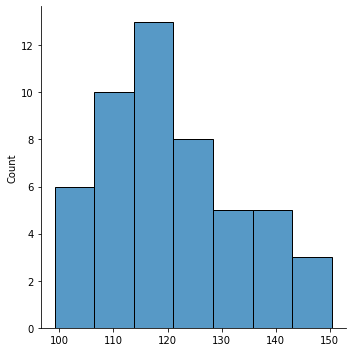

In [53]:
hist_Close_ETF = sns.displot(close_etf_50_of_20_means)

 <div class="alert alert-success">
<strong>Q4

In [54]:
np.asarray(close_etf_50_of_20_means).mean()

121.15296001200001

In [55]:
np.asarray(close_etf_50_of_20_means).std()

12.48917589776901

 <div class="alert alert-success">
<strong>Q5
<strong> The results are consistent with the Central Limit Theorem

 <div class="alert alert-success">
 <strong>Q6

In [56]:
# 50 groups of 20 values each
close_etf_10_of_100 = np.array_split(project_data['Close_ETF'].to_numpy(), 10)
close_etf_10_of_100

[array([ 97.349998,  97.75    ,  99.160004,  99.650002,  99.260002,
         98.25    ,  99.25    , 100.300003, 100.610001,  99.559998,
        101.660004, 101.660004, 101.57    , 100.019997,  99.440002,
         98.419998,  98.519997,  97.529999,  98.800003,  97.660004,
         97.629997,  98.529999,  99.769997,  98.739998, 100.699997,
        101.150002, 100.580002,  99.300003, 100.239998, 100.730003,
        100.510002,  99.919998,  98.5     ,  99.510002,  98.279999,
         99.169998,  99.239998,  98.489998, 100.230003,  99.860001,
         99.400002,  99.160004,  99.389999,  98.510002,  98.510002,
         96.419998,  96.980003,  98.      ,  98.279999,  98.650002,
         99.550003,  99.040001,  99.309998,  99.620003, 100.480003,
        100.860001, 100.449997, 100.769997,  99.769997,  99.93    ,
        100.110001, 100.139999, 100.760002, 101.440002, 102.800003,
        103.360001, 103.410004, 102.830002, 103.68    , 103.      ,
        101.959999, 102.260002, 102.449997, 102.

#### Q7

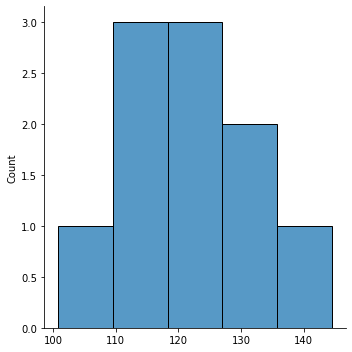

In [57]:
close_etf_10_of_100_means = np.mean(close_etf_10_of_100,axis=1)
hist_Close_ETF = sns.displot(close_etf_10_of_100_means)

In [58]:
np.asarray(close_etf_10_of_100_means).mean()

121.152960012

In [59]:
np.asarray(close_etf_10_of_100_means).std()

12.163756860892589

#### Q8
https://stackoverflow.com/questions/54730276/how-to-randomly-split-a-dataframe-into-several-smaller-dataframes

In [60]:
shuffled = project_data["Close_ETF"].sample(frac=1,replace=True)
close_etf_50_of_20_random = np.array_split(shuffled, 50) 

In [61]:
np.asarray(close_etf_50_of_20_random)

array([[141.619995, 114.900002, 143.119995, 127.220001, 109.459999,
        126.599998, 132.550003, 115.57    , 126.660004, 115.230003,
        104.209999, 119.629997, 141.869995, 116.550003, 132.550003,
        106.400002, 133.690002, 106.370003, 141.539993, 129.809998],
       [114.199997, 102.080002, 108.300003, 109.769997, 118.580002,
        120.860001, 133.080002, 123.339996,  98.5     , 126.639999,
        128.899994, 140.419998, 128.899994, 114.529999, 113.830002,
        113.040001, 142.789993, 117.      , 148.059998, 140.470001],
       [110.449997, 112.779999, 121.57    , 127.129997, 104.209999,
        141.869995, 131.009995, 118.699997, 103.410004, 126.230003,
         99.169998, 105.269997, 113.480003, 137.789993, 122.190002,
        117.43    , 118.440002, 111.      , 140.020004, 110.349998],
       [128.899994, 132.220001, 140.419998, 143.75    , 141.580002,
        139.020004, 130.509995, 118.599998, 124.      , 143.850006,
        105.760002, 100.230003, 127.269997, 1

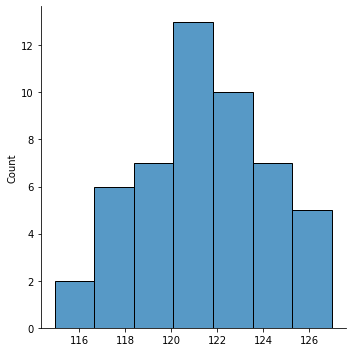

In [62]:
close_etf_50_of_20_random_means = np.mean(close_etf_50_of_20_random,axis=1)
hist_Close_ETF = sns.displot(close_etf_50_of_20_random_means)

In [63]:
np.asarray(close_etf_50_of_20_random_means).mean()

121.19802996100002

In [64]:
np.asarray(close_etf_50_of_20_random_means).std()

2.8854978572008543

# Part 5

1. Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence
interval of the mean.

In [65]:
# mean
mu_x = np.mean(project_data['Close_ETF'])

# standard deviation
sigma_x = np.std(project_data['Close_ETF'])

#  95% CI using one of the 10 SRS with size 100 for mu 
margin_error_100 = 1.96*sigma_x/(100**0.5) 
xbar_100 = close_etf_10_of_100_means[0]
lower_100, upper_100 = (xbar_100 - margin_error_100, xbar_100 + margin_error_100) 
print("95% CI for \u03BC: ({},{})".format(lower_100, upper_100)) 

95% CI for μ: (98.3118535361949,103.23674704380507)


2. Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence
interval of the mean.

In [66]:
#  95% CI using one of the 50 SRS with size 20 for mu
margin_error_20 = 1.96*sigma_x/(20**0.5) 
xbar_20 = close_etf_50_of_20_means[0] 
lower_20, upper_20 = (xbar_20 - margin_error_20, xbar_20 + margin_error_20) 
print("95% CI for \u03BC: ({},{})".format(lower_20, upper_20)) 

95% CI for μ: (93.81480246751815,104.82719913248187)


3. In Part 1, you have calculated the mean   of the population (the entire ETF column). Do the two intervals from 1) and 2)
above include (the true value of) the mean  ? Which one is more accurate? Why?

In [67]:
print("Population Mean \u03BC = {}".format(mu_x)) 

Population Mean μ = 121.1529600120001


The population mean falls within the 95% confidence intervals for both samples. The first confidence interval is more accurate, which is likely due to its larger sample size. The larger sample size resulted in a narrower confidence interval.

# Part 7

#### #1

In [68]:
significance_level = 0.05
gold_update = project_data['gold'].tolist()
oil_update = project_data['oil'].tolist()

t_test, p_value= stats.ttest_ind(gold_update, oil_update) 
print("The p_value is: ", p_value)

if p_value<significance_level:
    print("The test is failed to reject H0")
else:
    print("The test is reject H0")

The p_value is:  0.6274695292874639
The test is reject H0


### #2

In [69]:
difference_gold_oil = (project_data['gold'] - project_data['oil'])
sample_100_gold_oil = pd.Series(difference_gold_oil.sample(n=100, replace=True)) 
stats.norm.interval(alpha=0.95, loc=sample_100_gold_oil.mean(),scale=sample_100_gold_oil.std())
print("The sample of the mean is:",sample_100_gold_oil.mean())
print()

mu_diff = 0
std_diff= sample_100_gold_oil.std()
n_diff = 100
mu_0_diff = 100
S_x_diff = std_diff/np.sqrt(n_diff)
print("The result is:",S_x_diff)

T_test_diff = (mu_diff - mu_0_diff)/S_x_diff
print("The value is:",T_test_diff)

pval_diff = stats.t.sf(np.abs(T_test_diff), n_diff-1)*2
print("The p value is:",pval_diff)

significance_level = 0.05
t_test, p_value= stats.ttest_ind(difference_gold_oil,sample_100_gold_oil) 
print("The p_value is: ", p_value)
if pval_diff>significance_level: print("The test is failed to reject H0") 
else: print("The test is reject H0")

The sample of the mean is: -0.00105228373

The result is: 0.0021535094046183385
The value is: -46435.83157126856
The p value is: 0.0
The p_value is:  0.7608758405440148
The test is reject H0


### #3

In [70]:
significance_level = 0.05

gold_new_update = project_data['gold']
oil_new_update = project_data['oil']

sample_100_gold = pd.Series(gold_new_update.sample(n=100, replace=True)) 
stats.norm.interval(alpha=0.95, loc=sample_100_gold.mean(), scale=sample_100_gold.std())

sample_100_oil = pd.Series(oil_new_update.sample(n=100, replace=True)) 
stats.norm.interval(alpha=0.95, loc=sample_100_oil.mean(), scale=sample_100_oil.std())

print("The gold sample of the mean is:",sample_100_gold.mean())
print()

print("The oil sample of the mean is:",sample_100_oil.mean())
print()

f = np.var(project_data['gold']) / np.var(project_data['oil'])
n_oil = 50
n_gold = 50
result = 1-scipy.stats.f.cdf(f, n_oil - 1, n_gold -1)

print("The result is: ",result)

if p_value>significance_level:
    print("The test is failed to reject H0")
else:
    print("The test is reject H0")

The gold sample of the mean is: 0.00055627798

The oil sample of the mean is: 0.00163587638

The result is:  0.999987979230873
The test is failed to reject H0


# Part 8

1. Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the
scatter plot?

2. Calculate the coefficient of correlation between ETF and Gold and interpret it.

3. Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line?
How to interpret them?

4. Conduct a two-tailed t-test with : . What is the P-value of the test? Is the linear relationship between ETF (Y) and
Gold (X) significant at the significance level 0.01? Why or why not?

5. Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why
not?

6. What are the assumptions you made for this model fitting?

7. Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF
return, and the 99% prediction interval of the individual daily ETF return.



1. Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the
scatter plot?

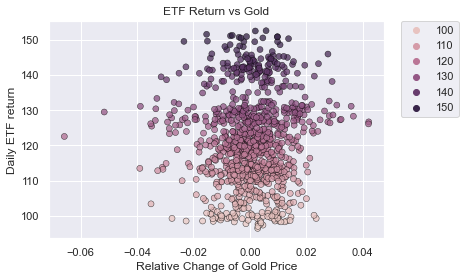

In [71]:
# Scatterplot for Gold vs ETF
x = 'gold'
y = 'Close_ETF'
sns.set_theme()
sns.scatterplot(data = project_data, x = x, y = y, alpha=15/20, hue = y, edgecolor='black');
plt.title(f'ETF Return vs Gold')
plt.xlabel('Relative Change of Gold Price')
plt.ylabel('Daily ETF return')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


There is no linear relationship between Gold and ETF Return visible in this scatter plot.

2. Calculate the coefficient of correlation between ETF and Gold and interpret it.

In [72]:
project_data[['Close_ETF', 'gold']].corr()

,Close_ETF,gold
Close_ETF,1.000000,0.022996
gold,0.022996,1.000000


The correlation between Gold and ETF is positive but very weak. Because the correlation is insignificant, we shouldn't expect to see Gold Price change as ETF changes, or vice versa.

3. Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line?
How to interpret them?

In [73]:
X = project_data['gold']
X = sm.add_constant(X)
y = project_data['Close_ETF']

C:\Users\agome\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
# OLS Regression
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5280
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.468
Time:                        16:24:55   Log-Likelihood:                -3949.5
No. Observations:                1000   AIC:                             7903.
Df Residuals:                     998   BIC:                             7913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1360      0.398    304.155      0.0

In [75]:
const, m = results.params[0], results.params[1]
print('intercept:', const)
print('slope :', m)

intercept: 121.13598849889824
slope : 25.604389324427746


In the above output, the intercept represents the price of an ETF when the price of gold doesn't experience a price change. The coefficient represents the incremental change of the ETF price with respect to gold's daily price change. 

The slope has a value of 25.60. This means that if the price of gold increases or decreases by 100% of its value, the ETF price increases or decreases by $25.60.

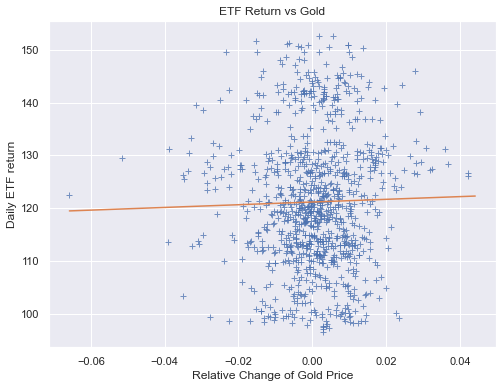

In [76]:
plt.figure(figsize = (8,6))
x = project_data['gold']
sns.set_theme()
plt.plot(x, project_data['Close_ETF'], '+', alpha=15/20);
plt.title(f'ETF Return vs Gold')
plt.xlabel('Relative Change of Gold Price')
plt.ylabel('Daily ETF return')
line = np.arange(min(x), max(x)+.01, 0.01)
plt.plot(line, const + m*line)
plt.show()

4. Conduct a two-tailed t-test. What is the P-value of the test? Is the linear relationship between ETF (Y) and
Gold (X) significant at the significance level 0.01? Why or why not?

In [77]:
# Check P-value
results.pvalues

const    0.000000
gold     0.467612
dtype: float64

The P-value is 0.467612. Because the P-value > 0.01, the linear relationship between ETF and Gold is not significant at the significance level of 0.01.

5. Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why
not?

In [78]:
# Check R^2 Statistic
results.rsquared

0.0005287962431228532

According to the R squared value of 0.00053, the above model can only account for 0.05% of the ETF's variance. This is not a strong predictive capability.

6. What are the assumptions you made for this model fitting?

Linear regression has 4 main assumptions. 

I: Linear relationship between X (Gold) and Y (ETF).

II: Multivariate normality. There is a constant variance across residuals for any value of Gold.

III: Residuals of the model are normally distributed.

IV: All observed data is idependant from each other.

7. Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF
return, and the 99% prediction interval of the individual daily ETF return.

In [79]:
new_data = {'gold':[0.005127, 0, -1]}
X = pd.DataFrame.from_dict(new_data)['gold']
print(X)
X = sm.add_constant(X)
print(X.shape)


0    0.005127
1    0.000000
2   -1.000000
Name: gold, dtype: float64
(3, 2)


C:\Users\agome\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
predictions = results.get_prediction(X)
# https://www.statsmodels.org/devel/generated/statsmodels.tsa.base.prediction.PredictionResults.summary_frame.html
(predictions.summary_frame(alpha=0.01)).loc[0,:]

mean             121.267262
mean_se            0.427572
mean_ci_lower    120.163800
mean_ci_upper    122.370725
obs_ci_lower      88.801169
obs_ci_upper     153.733355
Name: 0, dtype: float64

In [81]:
stats.norm.interval(alpha=0.99, loc=np.mean(project_data['Close_ETF']), scale=stats.sem(project_data['Close_ETF']))

(120.12908931791779, 122.1768307060824)

# Part 9

In [82]:
X = project_data[['oil','gold']]
y = project_data['Close_ETF']

In [83]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=100)

In [84]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

In [85]:
lrc = LinearRegression()

In [86]:
lrc.fit(X_train_n, y_train)
y_pred = lrc.predict(X_test_n)

In [87]:
metrics.r2_score(y_test,y_pred)

-0.005967635039668018

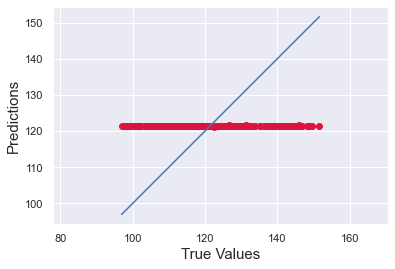

In [88]:
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

R^2 score is nearly 0, therefore these values are not useful in predicting ETF.

<div class="alert alert-info">
    <strong> Part 10

In [97]:
from statsmodels.formula.api import ols
model = 'gold ~ oil'
results = ols(model,data=project_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gold   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     58.68
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           4.38e-14
Time:                        17:33:31   Log-Likelihood:                 3094.0
No. Observations:                1000   AIC:                            -6184.
Df Residuals:                     998   BIC:                            -6174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.533      0.125      -0.000       0.001
oil            0.1261      0.016      7.660      0.000       0.094       0.158
==============================================================================
Omnibus:                       98.959   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.008
Skew:                          -0.525   Prob(JB):                     4.69e-58
Kurtosis:                       5.288   Cond. No.                         47.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SAS Code:
<strong>proc reg data=WORK.LOGGING;
model Close_ETF = gold oil;
run;
    
    The regression line that SAS calculates from the data is an estimate of a theoretical line describing the relationship between the independent variable ( X ) and the dependent variable ( Y ).A simple linear regression analysis is used to develop an equation (a linear regression line) for predicting the dependent variable given a value ( x ) of the independent variable.

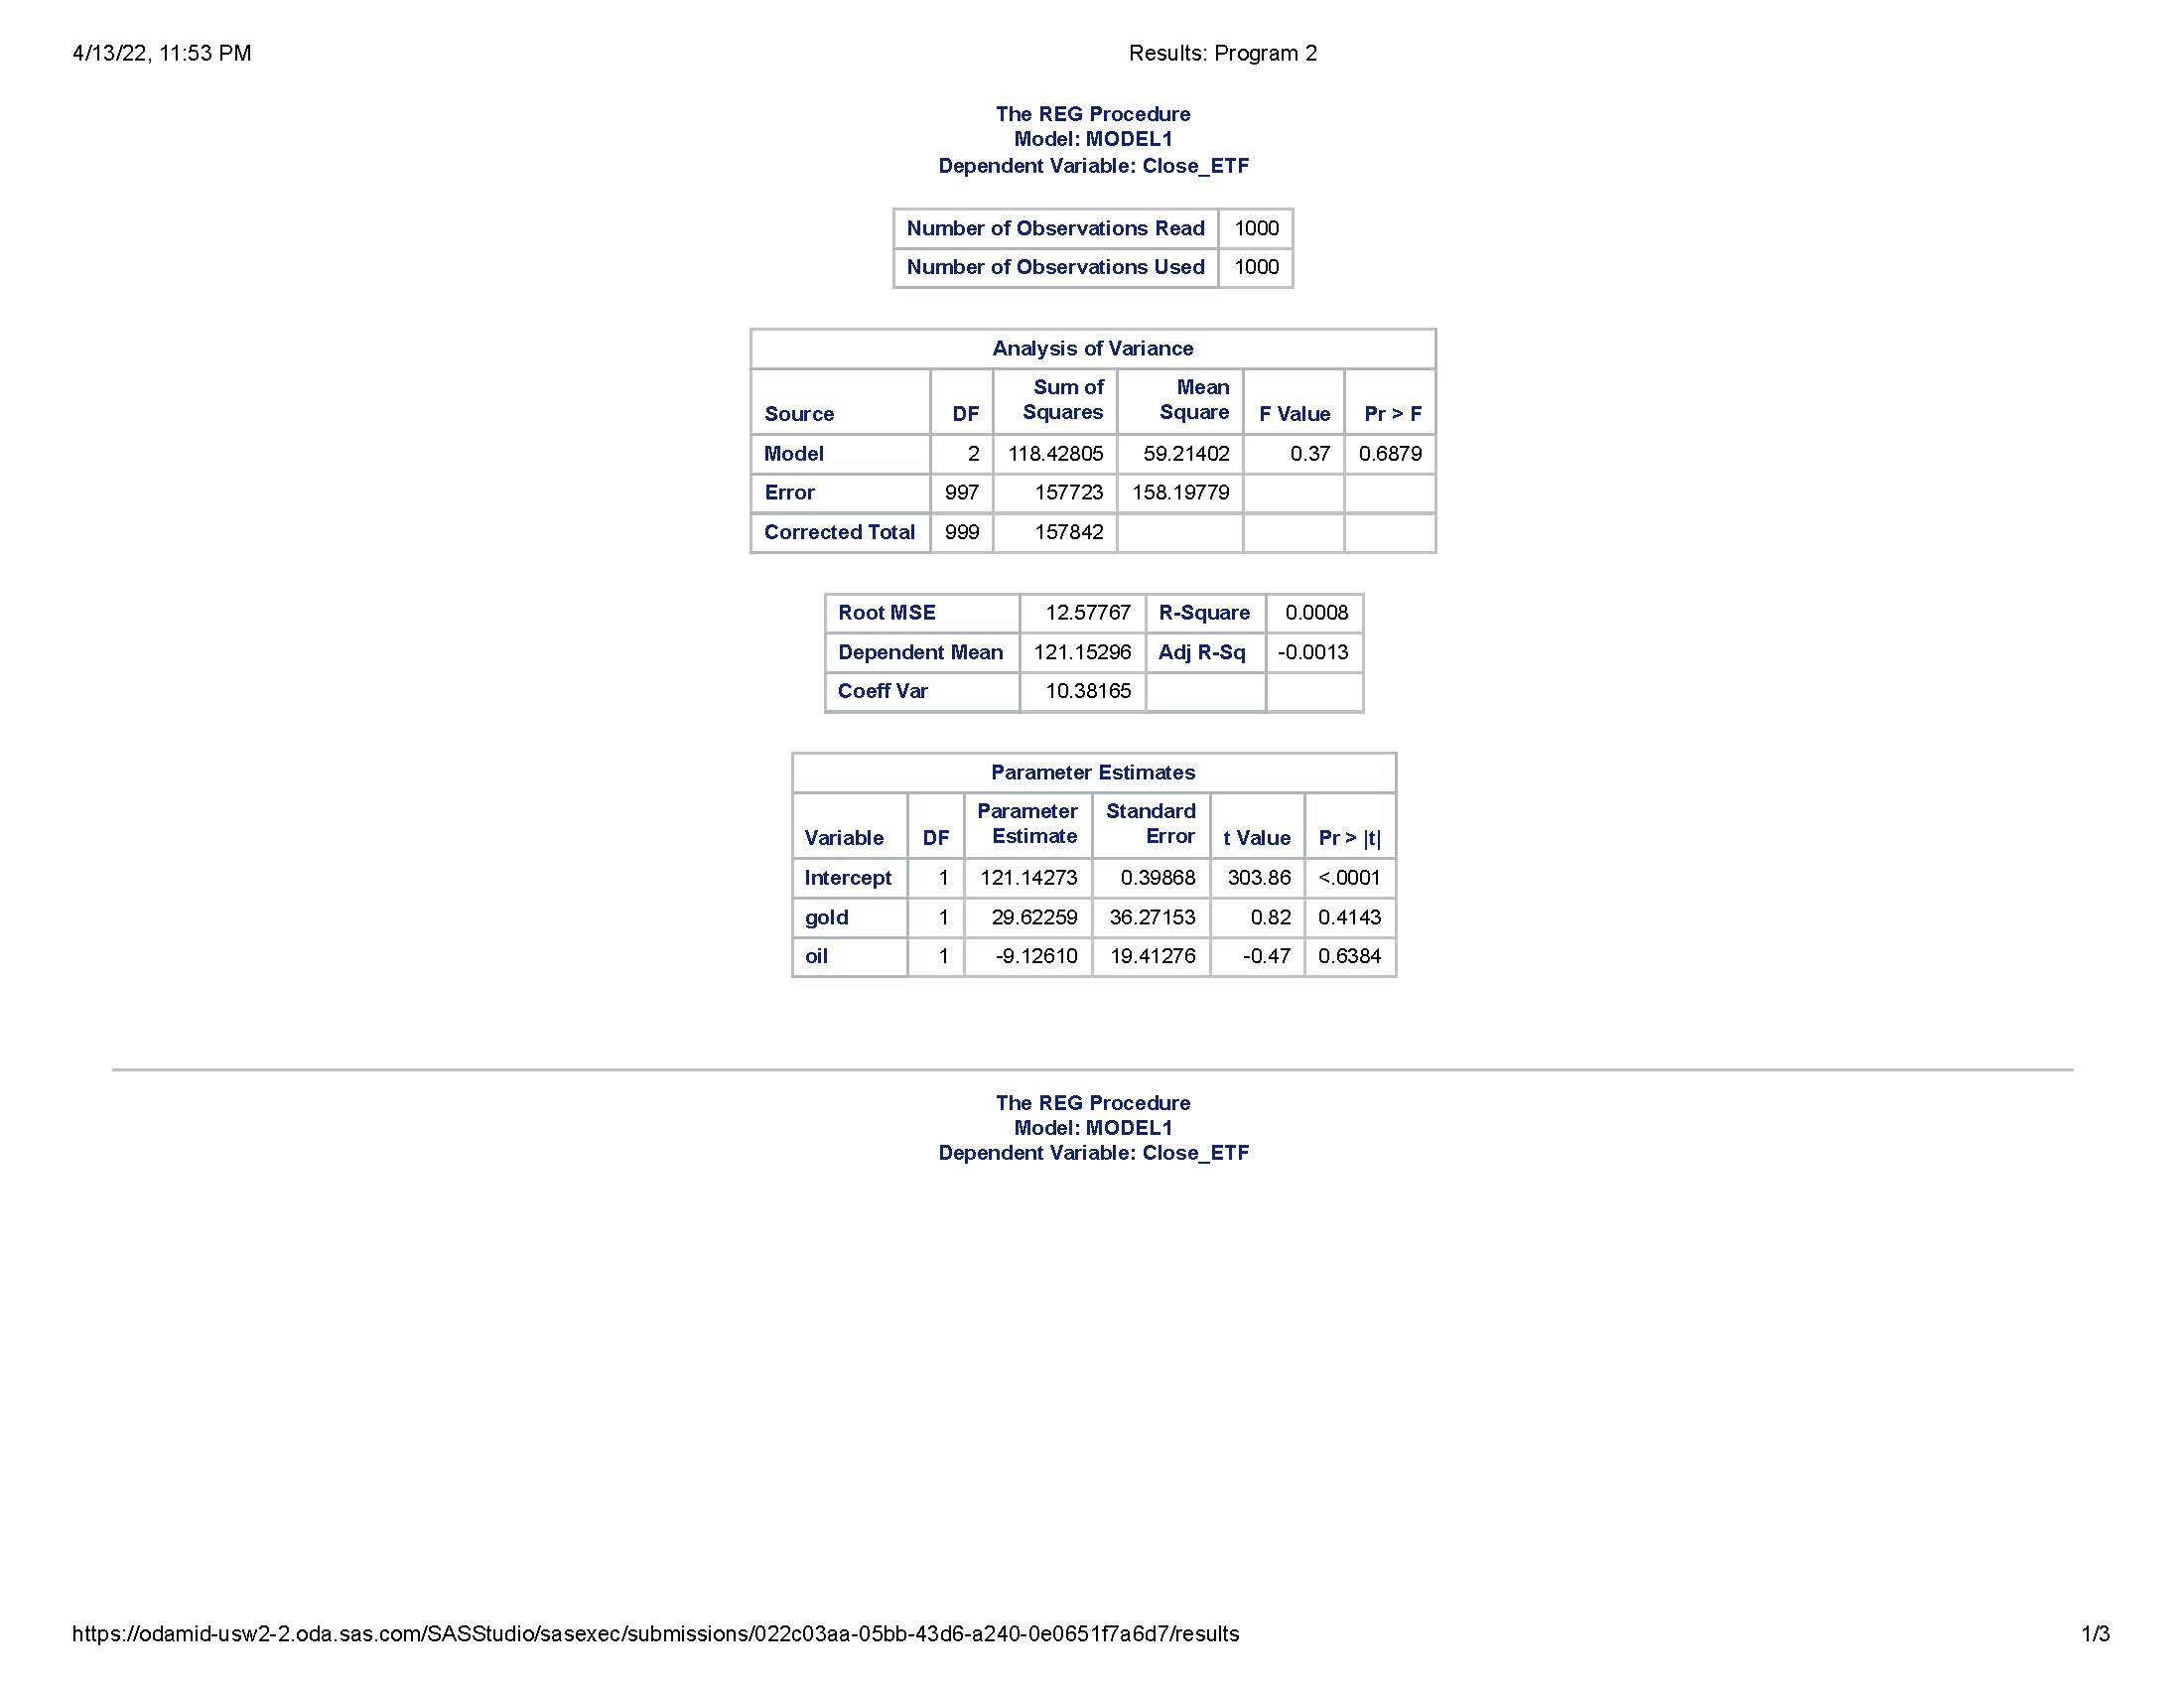

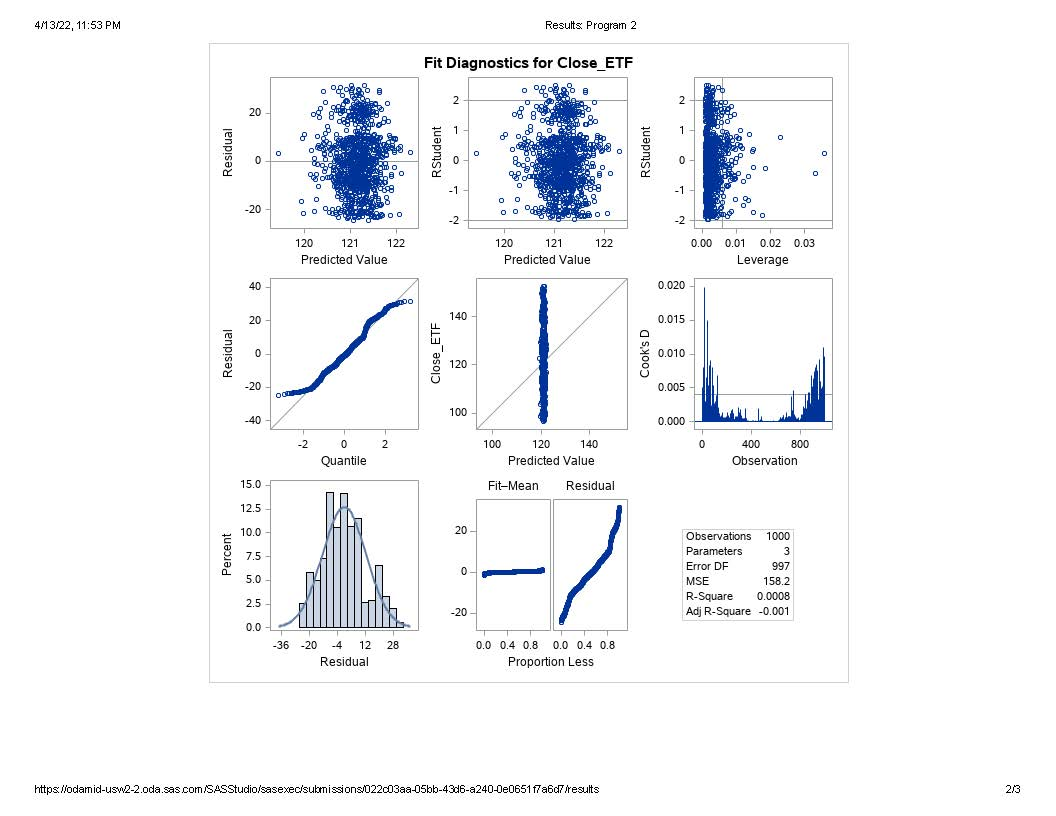

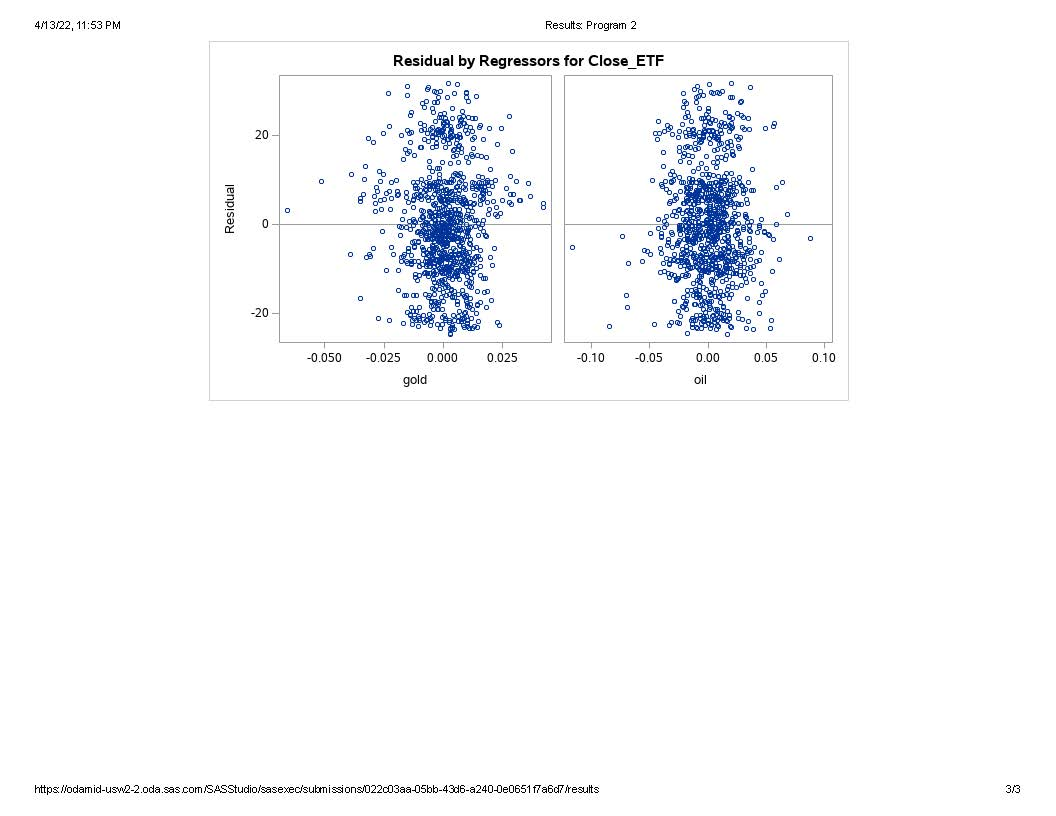

In [110]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='SASResultsPage_1.jpg') 
y = Image(filename='SASResultsPage_2.jpg') 
z  =Image(filename='SASResultsPage_3.jpg') 
display (x,y,z)


